# User Behavior Analysis and A/B Testing in App Navigation


# Content

1. Introduction and Objectives
2. Steps Taken
3. Data Processing
4. Data Analysis
5. Conclusion

# Introduction and Objectives

In a startup that sells food products, we need to analyze user behavior within the company's application. First, it is essential to study the sales funnel and identify the paths users take to reach the purchase stage. How many users successfully complete a purchase? How many drop off at earlier stages? At which exact stage does this happen?

Next, we need to review the results of an A/A/B test. The web design team wants to change the font across the entire application, but the product manager is concerned that users might find the new design disruptive. To make a data-driven decision, they decided to conduct an A/A/B test.

Users were divided into three groups: two control groups were shown the old font version, while one test group was shown the new font version. Our goal is to determine which font yields the best results.

Having two A (control) groups provides certain advantages. We can establish a rule that the test's accuracy is only valid if both control groups produce similar results. If there is a significant difference between the two A groups, this can help identify potential factors that might distort our findings. Comparing the control groups also gives us insight into the time and data required for the subsequent testing process.

# Steps Taken

1. Open the Data File and Review General Information. Load the dataset and explore its general structure.
2. Prepare the Data for Analysis
    * Rename columns as needed.
    * Check for missing values and data types. Clean and correct the data if necessary.
    * Add date and time columns, along with a separate column for the date.
3. Explore and Examine the Data
    * Determine the total number of events recorded in the log.
    * Count the number of unique users in the log.
    * Calculate the average number of events per user.
    * Identify the time period covered by the dataset by finding the minimum and maximum dates.
    * Create a histogram based on date and time to check data completeness.
    * Verify whether the dataset is consistent across the entire period.
    * Identify when the data becomes complete and exclude outdated data that might distort the overall distribution.
    * Determine the actual period represented by the data.
    * Assess whether removing older data results in significant event or user loss.
    * Ensure that users from all three experimental groups are present.
4. Analyze the Event Funnel
    * Identify all events in the log and their frequencies. Rank events by frequency.
    * Count the number of users performing each action and rank the events accordingly.
    * Calculate the proportion of users who performed each action at least once.
    * Determine the order of actions taken by users. Check if they form a consistent sequence (not all events need to be included in the funnel analysis).
    * Use the event funnel to calculate the percentage of users progressing through each stage. (For example, in the sequence A → B → C, calculate the ratio of users at stage B compared to stage A, and users at stage C compared to stage B).
    * Identify the stages where user drop-off is significant.
    * Determine the percentage of users who successfully complete all steps from the first event to the final purchase.
5. Analyze Experiment Results
    * Count the number of users in each experimental group.
    * In the A/A test, verify the mechanism and calculations by checking whether there is a statistically significant difference between sample groups 246 and 247. Select the most popular event and determine the number of users who performed it in each control group. Calculate the percentage and check whether differences between groups are statistically significant. Repeat the procedure for all other events (ideally, create a dedicated function to automate this testing process). Ensure that groups were properly randomized.
    * Perform the same analysis for users exposed to the new font version. Compare the results with each control group separately and with the combined control group results. Draw conclusions from the experiment based on the findings.
    * Determine the significance level for statistical hypothesis testing. Count the total number of hypothesis tests performed. With a statistical significance level of 0.1, one out of 10 results could be incorrect. Decide whether to adjust the significance level and rerun the previous steps if necessary to refine the conclusions.

# 1. Open the Data File and Review General Information.

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
import datetime as dt
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
import math
from scipy import stats

In [77]:
df = pd.read_csv('/datasets/logs_exp_us.csv', sep='\t')

In [78]:
df.sample(5)

,EventName,DeviceIDHash,EventTimestamp,ExpId
171942,OffersScreenAppear,1877880950237790633,1565028653,246
191742,MainScreenAppear,8053226986683644992,1565091063,247
182772,MainScreenAppear,7086945417901847497,1565073778,246
76637,MainScreenAppear,8803711870189910977,1564809291,247
30961,MainScreenAppear,2070535981871901035,1564679469,247


# 2. Prepare the Data for Analysis

In [79]:
# Merapikan nama kolom
df = df.rename(columns = {'EventName': 'event_name', 'DeviceIDHash': 'device_id_hash', 'EventTimestamp': 'event_time_stamp', 'ExpId': 'exp_id'})


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   event_name        244126 non-null  object
 1   device_id_hash    244126 non-null  int64 
 2   event_time_stamp  244126 non-null  int64 
 3   exp_id            244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [81]:
# ubah tipe data
df['event_time_stamp'] = pd.to_datetime(df['event_time_stamp'], unit='s')

In [82]:
df['date'] = df['event_time_stamp'].dt.date

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   event_name        244126 non-null  object        
 1   device_id_hash    244126 non-null  int64         
 2   event_time_stamp  244126 non-null  datetime64[ns]
 3   exp_id            244126 non-null  int64         
 4   date              244126 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 9.3+ MB


In [84]:
df.sample(5)

,event_name,device_id_hash,event_time_stamp,exp_id,date
196189,MainScreenAppear,6970800422549976561,2019-08-06 13:46:45,247,2019-08-06
230733,MainScreenAppear,5924419344399155002,2019-08-07 14:10:37,247,2019-08-07
209595,MainScreenAppear,7591988149828654727,2019-08-06 19:04:44,248,2019-08-06
138085,OffersScreenAppear,6765073978511963806,2019-08-04 19:24:35,248,2019-08-04
112980,PaymentScreenSuccessful,4699227090087181127,2019-08-04 07:35:54,246,2019-08-04


**Note**
- No missing data
- Column names have been renamed
- Data types have been adjusted, and a date column has been added

# 3. Review and analyze the data
## How many events are recorded in the log?

In [85]:
df.shape[0]

244126

## How many users are recorded in the log?

In [86]:
user_count = df['device_id_hash'].nunique()
user_count

7551

## What is the average number of events per user?

In [87]:
# Mengelompokkan peristiwa berdasarkan pengguna dan menghitung jumlah peristiwa per pengguna
peristiwa_per_pengguna = df.groupby('device_id_hash')['event_name'].count()

# Menghitung rata-rata peristiwa per pengguna
avg_peristiwa_per_pengguna = peristiwa_per_pengguna.mean()
avg_peristiwa_per_pengguna

32.33028737915508

## What time period does the data cover? Find the maximum and minimum dates. Create a histogram based on date and time. Can you confirm that the data is complete for the entire period? Some past events may appear in the log for certain users due to technical reasons, which could distort the overall data distribution. Identify the point when the data becomes complete and ignore the older data. What time period is truly represented by your dataset?

In [88]:
# Menentukan tanggal minimum
tanggal_minimum = df['event_time_stamp'].min()

# Menentukan tanggal maksimum
tanggal_maksimum = df['event_time_stamp'].max()

print("Tanggal Minimum:", tanggal_minimum)
print("Tanggal Maksimum:", tanggal_maksimum)

Tanggal Minimum: 2019-07-25 04:43:36
Tanggal Maksimum: 2019-08-07 21:15:17


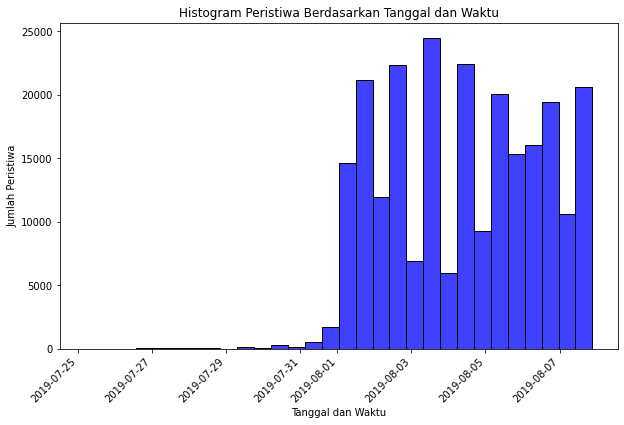

In [89]:
plt.figure(figsize=(10, 6))
sns.histplot(df['event_time_stamp'], bins=30, kde=False, color='blue', edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Tanggal dan Waktu')
plt.ylabel('Jumlah Peristiwa')
plt.title('Histogram Peristiwa Berdasarkan Tanggal dan Waktu')
plt.show()

**Note**
The available data from the histogram ranges from July 25, 2019, to August 7, 2019, but it is not complete for the entire period. The events with a fully distributed and complete dataset start from July 31, 2019, to August 7, 2019. Therefore, we have decided to use the data within this period.

## Did we lose a significant number of events and users after removing the old data?

In [90]:
df_filtered = df[df['event_time_stamp'] >= '2019-07-31']
df_filtered

,event_name,device_id_hash,event_time_stamp,exp_id,date
797,MainScreenAppear,3670880358399219515,2019-07-31 01:11:46,247,2019-07-31
798,OffersScreenAppear,3799109751993694887,2019-07-31 01:21:04,248,2019-07-31
799,Tutorial,1126021718529336913,2019-07-31 01:32:11,247,2019-07-31
800,MainScreenAppear,4293428370257583636,2019-07-31 02:19:18,248,2019-07-31
801,MainScreenAppear,4567464647598975872,2019-07-31 02:33:30,247,2019-07-31
...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07


In [91]:
total_baris = len(df)
jumlah_baris = len(df[df['event_time_stamp'] < '2019-07-31'])
persentase = (jumlah_baris / total_baris) * 100
print(f"Persentase data sebelum 31-07-2019: {persentase:.2f}%")

Persentase data sebelum 31-07-2019: 0.33%


**Note**
The excluded data accounts for less than 1%, so we have decided to use `df_filtered` for the next analysis.

## Ensure that users from all three experimental groups are present.

In [92]:
eksperimen = df_filtered['exp_id'].nunique()
print(f"Jumlah kelompok eksperimen: {eksperimen}")

Jumlah kelompok eksperimen: 3


In [93]:
df_filtered['exp_id'].unique()

array([247, 248, 246])

**Note** There are three experimental groups in the filtered data: Group 247, Group 248, and Group 246.

# 4. Analyze the event funnel

**1. Identify the events recorded in the log and their occurrence frequency. Sort the events based on their frequency.**

In [94]:
# jenis peristiwa
event = df_filtered['event_name'].value_counts(ascending=False)
event

MainScreenAppear           118681
OffersScreenAppear          46724
CartScreenAppear            42623
PaymentScreenSuccessful     34253
Tutorial                     1048
Name: event_name, dtype: int64

<AxesSubplot:>

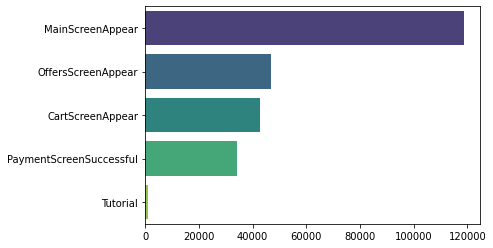

In [95]:
sns.barplot(x=event.values, y=event.index, palette="viridis")

**Note** There are five events recorded. The most frequent event is MainScreenAppear, while the least frequent event is Tutorial.

**2. Find the number of users who performed each action. Sort the events based on the number of users. Calculate the proportion of users who performed each action at least once.**

In [96]:
users_per_event = df_filtered.pivot_table(
    index='event_name',
    values='device_id_hash',
    aggfunc='nunique').sort_values('device_id_hash', ascending=False)
users_per_event

,device_id_hash
event_name,
MainScreenAppear,7429
OffersScreenAppear,4606
CartScreenAppear,3742
PaymentScreenSuccessful,3542
Tutorial,845


In [97]:
# Jumlah pengguna unik secara keseluruhan
total_users = df['device_id_hash'].nunique()

# Menghitung proporsi pengguna yang melakukan setidaknya satu tindakan
proporsi = users_per_event / total_users * 100
proporsi

,device_id_hash
event_name,
MainScreenAppear,98.384320
OffersScreenAppear,60.998543
CartScreenAppear,49.556350
PaymentScreenSuccessful,46.907694
Tutorial,11.190571


**Note** The event "MainScreenAppear" dominates the data, accounting for 98% of occurrences. This is likely the most common or initial action performed by users.

**3. In what order do these actions occur? Are they all part of a single sequence? You don’t need to include all events when calculating the funnel.**

In [98]:
# Mengurutkan DataFrame berdasarkan device_id_hash dan event_timestamp
df_sorted = df_filtered.sort_values(by=['device_id_hash', 'event_time_stamp'])
df_sorted

,event_name,device_id_hash,event_time_stamp,exp_id,date
197263,MainScreenAppear,6888746892508752,2019-08-06 14:06:34,246,2019-08-06
209196,MainScreenAppear,6909561520679493,2019-08-06 18:52:54,247,2019-08-06
209199,PaymentScreenSuccessful,6909561520679493,2019-08-06 18:52:58,247,2019-08-06
209200,CartScreenAppear,6909561520679493,2019-08-06 18:52:58,247,2019-08-06
209201,MainScreenAppear,6909561520679493,2019-08-06 18:52:58,247,2019-08-06
...,...,...,...,...,...
221366,MainScreenAppear,9222603179720523844,2019-08-07 09:13:37,248,2019-08-07
221404,MainScreenAppear,9222603179720523844,2019-08-07 09:14:53,248,2019-08-07
221406,MainScreenAppear,9222603179720523844,2019-08-07 09:15:01,248,2019-08-07
221412,MainScreenAppear,9222603179720523844,2019-08-07 09:15:13,248,2019-08-07


In [99]:
urutan_unik = df_sorted.groupby('device_id_hash')['event_name'].unique()
urutan_unik

device_id_hash
6888746892508752                                      [MainScreenAppear]
6909561520679493       [MainScreenAppear, PaymentScreenSuccessful, Ca...
6922444491712477       [MainScreenAppear, PaymentScreenSuccessful, Ca...
7435777799948366                                      [MainScreenAppear]
7702139951469979       [MainScreenAppear, OffersScreenAppear, CartScr...
                                             ...                        
9217594193087726423    [PaymentScreenSuccessful, CartScreenAppear, Of...
9219463515465815368    [MainScreenAppear, OffersScreenAppear, CartScr...
9220879493065341500    [MainScreenAppear, OffersScreenAppear, CartScr...
9221926045299980007                                   [MainScreenAppear]
9222603179720523844                                   [MainScreenAppear]
Name: event_name, Length: 7542, dtype: object

**Note** The events do not always follow a single sequence. Some users start with MainScreenAppear and proceed to the next steps, while others stop at the main screen. Additionally, some users go directly to the payment page. The event order varies among users.

**4. Use the event funnel to determine the percentage of users who progress from one stage to the next. (For example, in an event sequence A → B → C, calculate: The ratio of users at stage B to the number of users at stage A,the ratio of users at stage C to the number of users at stage B, this helps identify how many users continue through each step of the funnel).**

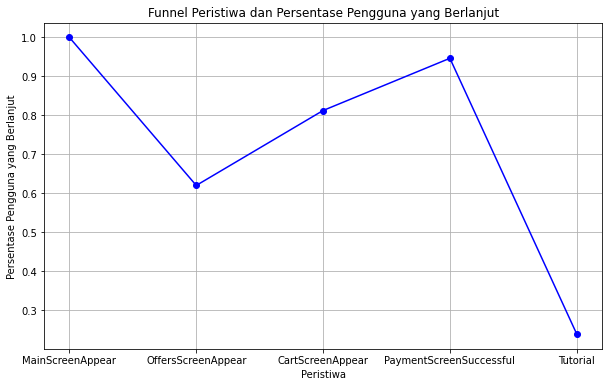

In [100]:
# Menganalisis Urutan Peristiwa
urutan_peristiwa = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful', 'Tutorial']

# Menghitung Jumlah Pengguna Unik pada Setiap Tahap
jumlah_pengguna_tahap = []

for peristiwa in urutan_peristiwa:
    jumlah_pengguna = df_sorted[df_sorted['event_name'] == peristiwa]['device_id_hash'].nunique()
    jumlah_pengguna_tahap.append(jumlah_pengguna)

# Menghitung Persentase Pengguna yang Berlanjut
persentase_berlanjut = [1.0]

for i in range(1, len(jumlah_pengguna_tahap)):
    persentase = jumlah_pengguna_tahap[i] / jumlah_pengguna_tahap[i - 1]
    persentase_berlanjut.append(persentase)

# Grafik
plt.figure(figsize=(10, 6))
plt.plot(urutan_peristiwa, persentase_berlanjut, marker='o', linestyle='-', color='b')
plt.title('Funnel Peristiwa dan Persentase Pengguna yang Berlanjut')
plt.xlabel('Peristiwa')
plt.ylabel('Persentase Pengguna yang Berlanjut')
plt.grid(True)
plt.show()

**5. Which stage do we lose the most users?**

**Note** Almost 40% of users drop off at the OfferScreenAppear stage, and only a small number of users visit the Tutorial page.

**6. What percentage of users successfully complete all stages, from the first event to payment?**

In [102]:
((users_per_event.loc['PaymentScreenSuccessful'] / users_per_event.loc['MainScreenAppear'])['device_id_hash'])*100

47.6780185758514

**Note** 47.6% of users successfully complete all stages from the first event to payment.

# 5. Analyze the experiment results

**1. How many users are in each group?**

In [103]:
user_per_group = df_sorted.groupby('exp_id')['device_id_hash'].nunique()
user_per_group

exp_id
246    2485
247    2517
248    2540
Name: device_id_hash, dtype: int64

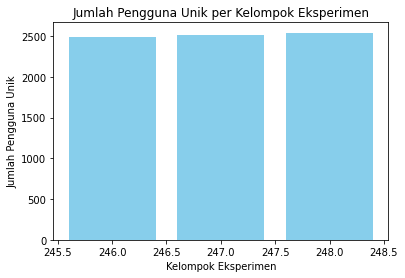

In [104]:
plt.bar(user_per_group.index, user_per_group.values, color='skyblue')
plt.xlabel('Kelompok Eksperimen')
plt.ylabel('Jumlah Pengguna Unik')
plt.title('Jumlah Pengguna Unik per Kelompok Eksperimen')
plt.show()

**Note** The difference in the number of users across groups is not significant.

**2. We have two control groups in the A/A testing to verify our mechanisms and calculations. Check if there is a statistically significant difference between samples 246 and 247.**

In [105]:
# Mengambil data jumlah pengguna untuk masing-masing kelompok
sample_246 = df_sorted[df_sorted['exp_id'] == 246]['device_id_hash']
sample_247 = df_sorted[df_sorted['exp_id'] == 247]['device_id_hash']

# Melakukan uji t independen
statistik, p_value = ttest_ind(sample_246, sample_247)

# Menampilkan hasil
print("Statistik uji t:", statistik)
print("Nilai p:", p_value)

# Menentukan apakah perbedaan signifikan
alpha = 0.05
if p_value < alpha:
    print("Ada perbedaan signifikan antara sample 246 dan 247.")
else:
    print("Tidak ada perbedaan signifikan antara sample 246 dan 247.")


Statistik uji t: -10.34871800538771
Nilai p: 4.320436755174097e-25
Ada perbedaan signifikan antara sample 246 dan 247.


In [106]:
# Melakukan uji Mann-Whitney
statistik, p_value = mannwhitneyu(sample_246, sample_247)

# Menampilkan hasil
print("Statistik uji Mann-Whitney:", statistik)
print("Nilai p:", p_value)

# Menentukan apakah perbedaan signifikan
alpha = 0.05
if p_value < alpha:
    print("Ada perbedaan signifikan antara kelompok 246 dan 247.")
else:
    print("Tidak ada perbedaan signifikan antara kelompok 246 dan 247.")

Statistik uji Mann-Whitney: 3020386277.0
Nilai p: 3.643835844223758e-25
Ada perbedaan signifikan antara kelompok 246 dan 247.


**Note** Both the t-test and Mann-Whitney test result in a very small p-value, indicating a significant difference in the distribution ranks between groups 246 and 247.

**3. Identify the most popular event. For each control group, determine the number and percentage of users who performed this action. Check whether the differences between groups are statistically significant. Repeat this process for all events. (Creating a function to automate this testing would save time). Confirm that the groups were properly separated.**

In [107]:
user_per_peristiwa = df_sorted.pivot_table(index='event_name', values='device_id_hash', columns='exp_id', aggfunc='nunique').sort_values(by=246, ascending=False)
user_per_peristiwa

exp_id,246,247,248
event_name,,,
MainScreenAppear,2452,2479,2498
OffersScreenAppear,1544,1526,1536
CartScreenAppear,1267,1239,1236
PaymentScreenSuccessful,1200,1159,1183
Tutorial,278,285,282


In [108]:
pop_event = user_per_peristiwa.groupby('event_name').sum().idxmax()
pop_event

exp_id
246    MainScreenAppear
247    MainScreenAppear
248    MainScreenAppear
dtype: object

In [109]:
persentase_per_peristiwa = (user_per_peristiwa / user_per_group) * 100
persentase_per_peristiwa

exp_id,246,247,248
event_name,,,
MainScreenAppear,98.672032,98.490266,98.346457
OffersScreenAppear,62.132797,60.627731,60.472441
CartScreenAppear,50.985915,49.225268,48.661417
PaymentScreenSuccessful,48.289738,46.046881,46.574803
Tutorial,11.187123,11.323004,11.102362


In [110]:
def check_hypothesis(successes1, successes2, trials1, trials2, alpha=0.1):
    p1 = successes1/trials1
    p2 = successes2/trials2
    p_combined = (successes1+successes2)/(trials1 + trials2)
    difference = p1-p2
    z_value = difference/math.sqrt(p_combined * (1-p_combined) * (1/trials1 + 1/trials2))
    distr = stats.norm(0, 1)
    
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    
    print('p_value:', p_value)
    
    if (p_value < alpha):
        print('menolak H0: terdapat perbedaan yang signifikan dari kelompok')
    else:
        print('gagal menolak H0: tidak ada perbedaan signifikan antara kelompok')

In [111]:
check_hypothesis(user_per_peristiwa.loc['MainScreenAppear', 246],
                user_per_peristiwa.loc['MainScreenAppear', 247],
                user_per_group.loc[246],
                user_per_group.loc[247])

p_value: 0.5868776836512959
gagal menolak H0: tidak ada perbedaan signifikan antara kelompok


In [112]:
def check_event_hypothesis(user_per_peristiwa, user_per_group,
                           event,
                           exp1, exp2
                          ):
    frac1 = user_per_peristiwa.loc[event, exp1] / user_per_group.loc[exp1]
    frac2 = user_per_peristiwa.loc[event, exp2] / user_per_group.loc[exp2]
    print(f'event {event} group {exp1}')
    print(f'event {event} group {exp2}')
    check_hypothesis(user_per_peristiwa.loc[event, exp1],
                     user_per_peristiwa.loc[event, exp2],
                     user_per_group.loc[exp1],
                     user_per_group.loc[exp2],alpha=0.01
                    )

In [113]:
for event in user_per_peristiwa.index:
    check_event_hypothesis(user_per_peristiwa, user_per_group, event, 246, 247)
    print('--------------------------------------------------------------------')

event MainScreenAppear group 246
event MainScreenAppear group 247
p_value: 0.5868776836512959
gagal menolak H0: tidak ada perbedaan signifikan antara kelompok
--------------------------------------------------------------------
event OffersScreenAppear group 246
event OffersScreenAppear group 247
p_value: 0.2743505991932964
gagal menolak H0: tidak ada perbedaan signifikan antara kelompok
--------------------------------------------------------------------
event CartScreenAppear group 246
event CartScreenAppear group 247
p_value: 0.21306131796590932
gagal menolak H0: tidak ada perbedaan signifikan antara kelompok
--------------------------------------------------------------------
event PaymentScreenSuccessful group 246
event PaymentScreenSuccessful group 247
p_value: 0.11210845100173072
gagal menolak H0: tidak ada perbedaan signifikan antara kelompok
--------------------------------------------------------------------
event Tutorial group 246
event Tutorial group 247
p_value: 0.8791608

**Note** Based on the statistical tests, we can conclude that for all tested events (MainScreenAppear, OfferScreenAppear, CartScreenAppear, PaymentScreenSuccessful, and Tutorial), there is no significant difference between groups 246 and 247.

**4. Perform the same analysis for the group exposed to the new font version. Compare the results with each control group (246 and 247) for each event separately. Compare the results with the combined control group. What conclusions can be drawn from the experiment?**

In [114]:
#246 (A) dan 248 (B)
for event in user_per_peristiwa.index:
    check_event_hypothesis(user_per_peristiwa, user_per_group, event, 246, 248)
    print('--------------------------------------------------------------------')

event MainScreenAppear group 246
event MainScreenAppear group 248
p_value: 0.341286386031747
gagal menolak H0: tidak ada perbedaan signifikan antara kelompok
--------------------------------------------------------------------
event OffersScreenAppear group 246
event OffersScreenAppear group 248
p_value: 0.22699680075034445
gagal menolak H0: tidak ada perbedaan signifikan antara kelompok
--------------------------------------------------------------------
event CartScreenAppear group 246
event CartScreenAppear group 248
p_value: 0.09941721664866177
gagal menolak H0: tidak ada perbedaan signifikan antara kelompok
--------------------------------------------------------------------
event PaymentScreenSuccessful group 246
event PaymentScreenSuccessful group 248
p_value: 0.22352231840506898
gagal menolak H0: tidak ada perbedaan signifikan antara kelompok
--------------------------------------------------------------------
event Tutorial group 246
event Tutorial group 248
p_value: 0.9239467

In [115]:
#247 (A) dan 248 (B)
for event in user_per_peristiwa.index:
    check_event_hypothesis(user_per_peristiwa, user_per_group, event, 247, 248)
    print('--------------------------------------------------------------------')

event MainScreenAppear group 247
event MainScreenAppear group 248
p_value: 0.681958382603927
gagal menolak H0: tidak ada perbedaan signifikan antara kelompok
--------------------------------------------------------------------
event OffersScreenAppear group 247
event OffersScreenAppear group 248
p_value: 0.9100517394454506
gagal menolak H0: tidak ada perbedaan signifikan antara kelompok
--------------------------------------------------------------------
event CartScreenAppear group 247
event CartScreenAppear group 248
p_value: 0.6883799508125226
gagal menolak H0: tidak ada perbedaan signifikan antara kelompok
--------------------------------------------------------------------
event PaymentScreenSuccessful group 247
event PaymentScreenSuccessful group 248
p_value: 0.7065894728746211
gagal menolak H0: tidak ada perbedaan signifikan antara kelompok
--------------------------------------------------------------------
event Tutorial group 247
event Tutorial group 248
p_value: 0.8036365214

In [116]:
user_peristiwa_per_group_control = user_per_peristiwa.copy()
user_peristiwa_per_group_control.loc[:, 247] += user_peristiwa_per_group_control.loc[:, 246]
user_peristiwa_per_group_control.drop(columns=246, inplace=True)
user_peristiwa_per_group_control

exp_id,247,248
event_name,,
MainScreenAppear,4931,2498
OffersScreenAppear,3070,1536
CartScreenAppear,2506,1236
PaymentScreenSuccessful,2359,1183
Tutorial,563,282


In [117]:
user_per_group_control = user_per_group.copy()
user_per_group_control.loc[247] += user_per_group_control.loc[246]
user_per_group_control.drop(246, inplace=True)
user_per_group_control

exp_id
247    5002
248    2540
Name: device_id_hash, dtype: int64

In [118]:
#246+247 (A) dan 248 (B)
for event in user_per_peristiwa.index:
    check_event_hypothesis(user_peristiwa_per_group_control, user_per_group_control, event, 247, 248)
    print('--------------------------------------------------------------------')

event MainScreenAppear group 247
event MainScreenAppear group 248
p_value: 0.42897263461182167
gagal menolak H0: tidak ada perbedaan signifikan antara kelompok
--------------------------------------------------------------------
event OffersScreenAppear group 247
event OffersScreenAppear group 248
p_value: 0.4471809415681398
gagal menolak H0: tidak ada perbedaan signifikan antara kelompok
--------------------------------------------------------------------
event CartScreenAppear group 247
event CartScreenAppear group 248
p_value: 0.23764471031415635
gagal menolak H0: tidak ada perbedaan signifikan antara kelompok
--------------------------------------------------------------------
event PaymentScreenSuccessful group 247
event PaymentScreenSuccessful group 248
p_value: 0.629668311887492
gagal menolak H0: tidak ada perbedaan signifikan antara kelompok
--------------------------------------------------------------------
event Tutorial group 247
event Tutorial group 248
p_value: 0.84205237

**Note** Based on the available data and the testing methods used, there is not enough statistical evidence to indicate a significant difference between the groups.

**5. What significance level did you set for testing the statistical hypotheses? Count the number of hypothesis tests performed. With a 0.1 significance level, one out of ten results could be incorrect. What significance level should be used? If you decide to adjust it, rerun the previous steps and re-evaluate your conclusions.**

**Alpha 0.05**

In [119]:
def check_event_hypothesis(user_per_peristiwa, user_per_group,
                           event,
                           exp1, exp2
                          ):
    frac1 = user_per_peristiwa.loc[event, exp1] / user_per_group.loc[exp1]
    frac2 = user_per_peristiwa.loc[event, exp2] / user_per_group.loc[exp2]
    print(f'event {event} group {exp1}')
    print(f'event {event} group {exp2}')
    check_hypothesis(user_per_peristiwa.loc[event, exp1],
                     user_per_peristiwa.loc[event, exp2],
                     user_per_group.loc[exp1],
                     user_per_group.loc[exp2],alpha=0.05
                    )

In [120]:
#246 (A) dan 248 (B)
for event in user_per_peristiwa.index:
    check_event_hypothesis(user_per_peristiwa, user_per_group, event, 246, 248)
    print('--------------------------------------------------------------------')

event MainScreenAppear group 246
event MainScreenAppear group 248
p_value: 0.341286386031747
gagal menolak H0: tidak ada perbedaan signifikan antara kelompok
--------------------------------------------------------------------
event OffersScreenAppear group 246
event OffersScreenAppear group 248
p_value: 0.22699680075034445
gagal menolak H0: tidak ada perbedaan signifikan antara kelompok
--------------------------------------------------------------------
event CartScreenAppear group 246
event CartScreenAppear group 248
p_value: 0.09941721664866177
gagal menolak H0: tidak ada perbedaan signifikan antara kelompok
--------------------------------------------------------------------
event PaymentScreenSuccessful group 246
event PaymentScreenSuccessful group 248
p_value: 0.22352231840506898
gagal menolak H0: tidak ada perbedaan signifikan antara kelompok
--------------------------------------------------------------------
event Tutorial group 246
event Tutorial group 248
p_value: 0.9239467

In [121]:
#247 (A) dan 248 (B)
for event in user_per_peristiwa.index:
    check_event_hypothesis(user_per_peristiwa, user_per_group, event, 247, 248)
    print('--------------------------------------------------------------------')

event MainScreenAppear group 247
event MainScreenAppear group 248
p_value: 0.681958382603927
gagal menolak H0: tidak ada perbedaan signifikan antara kelompok
--------------------------------------------------------------------
event OffersScreenAppear group 247
event OffersScreenAppear group 248
p_value: 0.9100517394454506
gagal menolak H0: tidak ada perbedaan signifikan antara kelompok
--------------------------------------------------------------------
event CartScreenAppear group 247
event CartScreenAppear group 248
p_value: 0.6883799508125226
gagal menolak H0: tidak ada perbedaan signifikan antara kelompok
--------------------------------------------------------------------
event PaymentScreenSuccessful group 247
event PaymentScreenSuccessful group 248
p_value: 0.7065894728746211
gagal menolak H0: tidak ada perbedaan signifikan antara kelompok
--------------------------------------------------------------------
event Tutorial group 247
event Tutorial group 248
p_value: 0.8036365214

In [122]:
#246+247 (A) dan 248 (B)
for event in user_per_peristiwa.index:
    check_event_hypothesis(user_peristiwa_per_group_control, user_per_group_control, event, 247, 248)
    print('--------------------------------------------------------------------')

event MainScreenAppear group 247
event MainScreenAppear group 248
p_value: 0.42897263461182167
gagal menolak H0: tidak ada perbedaan signifikan antara kelompok
--------------------------------------------------------------------
event OffersScreenAppear group 247
event OffersScreenAppear group 248
p_value: 0.4471809415681398
gagal menolak H0: tidak ada perbedaan signifikan antara kelompok
--------------------------------------------------------------------
event CartScreenAppear group 247
event CartScreenAppear group 248
p_value: 0.23764471031415635
gagal menolak H0: tidak ada perbedaan signifikan antara kelompok
--------------------------------------------------------------------
event PaymentScreenSuccessful group 247
event PaymentScreenSuccessful group 248
p_value: 0.629668311887492
gagal menolak H0: tidak ada perbedaan signifikan antara kelompok
--------------------------------------------------------------------
event Tutorial group 247
event Tutorial group 248
p_value: 0.84205237

**Alpha 0.1**

In [123]:
def check_event_hypothesis(user_per_peristiwa, user_per_group,
                           event,
                           exp1, exp2
                          ):
    frac1 = user_per_peristiwa.loc[event, exp1] / user_per_group.loc[exp1]
    frac2 = user_per_peristiwa.loc[event, exp2] / user_per_group.loc[exp2]
    print(f'event {event} group {exp1}')
    print(f'event {event} group {exp2}')
    check_hypothesis(user_per_peristiwa.loc[event, exp1],
                     user_per_peristiwa.loc[event, exp2],
                     user_per_group.loc[exp1],
                     user_per_group.loc[exp2],alpha=0.1
                    )

In [124]:
#246 (A) dan 248 (B)
for event in user_per_peristiwa.index:
    check_event_hypothesis(user_per_peristiwa, user_per_group, event, 246, 248)
    print('--------------------------------------------------------------------')

event MainScreenAppear group 246
event MainScreenAppear group 248
p_value: 0.341286386031747
gagal menolak H0: tidak ada perbedaan signifikan antara kelompok
--------------------------------------------------------------------
event OffersScreenAppear group 246
event OffersScreenAppear group 248
p_value: 0.22699680075034445
gagal menolak H0: tidak ada perbedaan signifikan antara kelompok
--------------------------------------------------------------------
event CartScreenAppear group 246
event CartScreenAppear group 248
p_value: 0.09941721664866177
menolak H0: terdapat perbedaan yang signifikan dari kelompok
--------------------------------------------------------------------
event PaymentScreenSuccessful group 246
event PaymentScreenSuccessful group 248
p_value: 0.22352231840506898
gagal menolak H0: tidak ada perbedaan signifikan antara kelompok
--------------------------------------------------------------------
event Tutorial group 246
event Tutorial group 248
p_value: 0.92394673958

In [125]:
#247 (A) dan 248 (B)
for event in user_per_peristiwa.index:
    check_event_hypothesis(user_per_peristiwa, user_per_group, event, 247, 248)
    print('--------------------------------------------------------------------')

event MainScreenAppear group 247
event MainScreenAppear group 248
p_value: 0.681958382603927
gagal menolak H0: tidak ada perbedaan signifikan antara kelompok
--------------------------------------------------------------------
event OffersScreenAppear group 247
event OffersScreenAppear group 248
p_value: 0.9100517394454506
gagal menolak H0: tidak ada perbedaan signifikan antara kelompok
--------------------------------------------------------------------
event CartScreenAppear group 247
event CartScreenAppear group 248
p_value: 0.6883799508125226
gagal menolak H0: tidak ada perbedaan signifikan antara kelompok
--------------------------------------------------------------------
event PaymentScreenSuccessful group 247
event PaymentScreenSuccessful group 248
p_value: 0.7065894728746211
gagal menolak H0: tidak ada perbedaan signifikan antara kelompok
--------------------------------------------------------------------
event Tutorial group 247
event Tutorial group 248
p_value: 0.8036365214

In [126]:
#246+247 (A) dan 248 (B)
for event in user_per_peristiwa.index:
    check_event_hypothesis(user_peristiwa_per_group_control, user_per_group_control, event, 247, 248)
    print('--------------------------------------------------------------------')

event MainScreenAppear group 247
event MainScreenAppear group 248
p_value: 0.42897263461182167
gagal menolak H0: tidak ada perbedaan signifikan antara kelompok
--------------------------------------------------------------------
event OffersScreenAppear group 247
event OffersScreenAppear group 248
p_value: 0.4471809415681398
gagal menolak H0: tidak ada perbedaan signifikan antara kelompok
--------------------------------------------------------------------
event CartScreenAppear group 247
event CartScreenAppear group 248
p_value: 0.23764471031415635
gagal menolak H0: tidak ada perbedaan signifikan antara kelompok
--------------------------------------------------------------------
event PaymentScreenSuccessful group 247
event PaymentScreenSuccessful group 248
p_value: 0.629668311887492
gagal menolak H0: tidak ada perbedaan signifikan antara kelompok
--------------------------------------------------------------------
event Tutorial group 247
event Tutorial group 248
p_value: 0.84205237

**Note** Regardless of the alpha level, the results remain the same: we fail to reject H₀, meaning there is no significant difference between group 246 and 248, group 247 and 248, or the combined control group and 248.

**General Conclusion**
1. Data Preparation
    * No missing data.
    * Column names have been cleaned.
    * Data types adjusted, and a date column was added.
2. Data Filtering
The dataset covers the period 25-07-2019 to 07-08-2019, but not all dates are complete.
Data is fully available from 31-07-2019 to 07-08-2019, so only this period is used for analysis.
3. Experiment Groups
The filtered dataset consists of three experiment groups:
246, 247, and 248.
4. Event Frequency
    * There are 5 distinct events in the dataset.
    * The most frequent event: MainScreenAppear.
    * The least frequent event: Tutorial.
5. Event Distribution
98% of users interact with MainScreenAppear, suggesting it's the first or most common action.
6. Event Order & User Behavior
    * The sequence of events varies among users.
    * Some move sequentially from MainScreenAppear.
    * Some skip to later stages (e.g., PaymentScreenSuccessful).
    * Others drop off early.
7. Drop-off Points
    * 40% of users drop off at OfferScreenAppear.
    * Very few users access the Tutorial page.
8. Group Size Comparison
The number of users in each group is balanced, with no significant differences.
9. A/A Test Results
    * Significant differences were found between groups 246 and 247 (p-value very small in t-test and Mann-Whitney test).
    * This indicates that the groups may not be randomly split or that some external factor is affecting them.
10. A/B Test Results
    * No significant differences were found between:
    * Groups 246 vs. 248.
    * Groups 247 vs. 248.
    * Combined control group vs. 248.
    * This suggests that the new font change did not affect user behavior.
11. Final Conclusion
    * Regardless of alpha level, the statistical results remain unchanged.
    * No significant impact of the new font on user behavior.
    * The experiment groups should be re-evaluated to ensure proper randomization in future tests.

**Insight**
* The event "MainScreenAppear" dominates the data, appearing 98% of the time. This likely means that most users start with this action or it is a common step.
* There is no fixed sequence of events followed by all users. Some users go through the entire process, while others stop at certain stages. This shows that user behavior varies.